In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report


digits = datasets.load_digits()
X = digits.data
y = digits.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


k_values = [3, 5, 7]
results = {}

for k in k_values:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    
    y_pred = knn.predict(X_test)
    
    
    results[k] = {
        "report": classification_report(y_test, y_pred, output_dict=True),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }


for k, result in results.items():
    print("K=",k)
    print("Classification Report:")
    
    print(result["report"])  
    print("Confusion Matrix:")
    print(result["confusion_matrix"])
    print("\n")

K= 3
Classification Report:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 53.0}, '1': {'precision': 0.9803921568627451, 'recall': 1.0, 'f1-score': 0.99009900990099, 'support': 50.0}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 47.0}, '3': {'precision': 0.9818181818181818, 'recall': 1.0, 'f1-score': 0.9908256880733944, 'support': 54.0}, '4': {'precision': 0.9836065573770492, 'recall': 1.0, 'f1-score': 0.9917355371900827, 'support': 60.0}, '5': {'precision': 0.9850746268656716, 'recall': 1.0, 'f1-score': 0.9924812030075187, 'support': 66.0}, '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 53.0}, '7': {'precision': 1.0, 'recall': 0.9818181818181818, 'f1-score': 0.9908256880733944, 'support': 55.0}, '8': {'precision': 0.9767441860465116, 'recall': 0.9767441860465116, 'f1-score': 0.9767441860465116, 'support': 43.0}, '9': {'precision': 0.9821428571428571, 'recall': 0.9322033898305084, 'f1-score': 0.9565217391304348, 'support': 

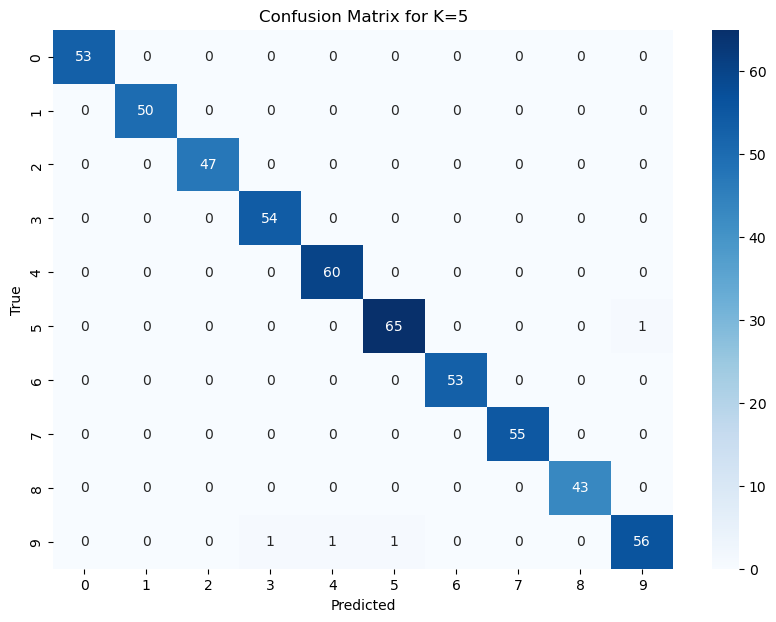

In [10]:

best_k = max(results, key=lambda k: results[k]["report"]["accuracy"])
best_cm = results[best_k]["confusion_matrix"]

## confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(best_cm, annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix for K={best_k}")
plt.show()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        54
           4       0.98      1.00      0.99        60
           5       0.98      0.97      0.98        66
           6       0.98      1.00      0.99        53
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        43
           9       0.98      0.95      0.97        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



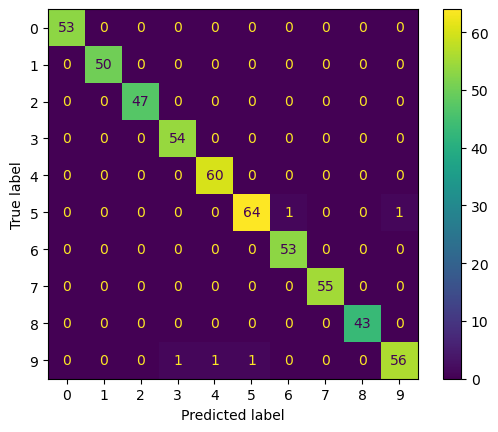

In [11]:
#plot
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

report = classification_report(y_test, y_pred)
print(report)

labels = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()
